# Plotly入門教程
 
一兩贅肉無  
和鯨社區kesci.com男運營，公眾號：和鯨社區  
52 人贊同了該文章  
Plotly是一個非常著名且強大的開來源資料視覺化框架，它通過構建基於流覽器顯示的web形式的可交互圖表來展示資訊，可創建多達數十種精美的圖表和地圖，本文以k-lab為開發工具，詳細介紹Plotly的基礎內容。  
本文所使用的資料集為 世界大學排行榜<https://link.zhihu.com/?target=https%3A//www.kesci.com/home/dataset/5bfe4c5e954d6e0010682700>  

## 数据集文档

### 数据集描述

#### 背景描述

世界上所有的大学中，哪所最好?

给大学排名是一项困难的、政治性的、有争议的实践。有数百个不同的国家和国际大学排名系统，其中许多彼此不一致。这个数据集包含了三个来自不同地方的全球大学排名。

《泰晤士报高等教育世界大学排名》被广泛认为是最具影响力和最受关注的大学排名之一。它于2010年在英国成立，一直因其商业化和破坏非英语教学机构而受到批评。

世界大学学术排名，也被称为上海排名，是一个同样有影响力的排名。它于2003年在中国成立，一直因专注于原始研究力量、破坏人文学科和教学质量而受到批评。

世界大学排名中心(Center for World University Rankings)是一个知名度较低的榜单，来自沙特阿拉伯，成立于2012年。

这些排名如何相互比较?
对这些排名的各种批评公平与否?
你的母校在与世界的竞争中表现如何?

#### 补充数据：
为了进一步扩展您的分析，这里提供了两组补充数据。

首先是一组关于世界各地教育成就的数据。它来自世界数据库，包括来自教科文组织统计研究所的信息和Barro-Lee数据集。

国民教育水平与各国大学的质量有何关系?
第二个补充数据集包含有关各国公共和私人直接教育支出的信息。这些数据来自国家教育统计中心。它表示支出占国内生产总值(gdp)的百分比。

教育投入越多，国际大学排名就越好吗?

### 数据说明

本数据集包括6个CSV文件，其中字段含义如下：
- world_rank：世界大学排名
- institution：学校名称
- country：各大学所属国家
- national_rank：国内大学排名
- quality_of_education：教育质量排名
- alumni_employment：校友就业排名
- quality_of_faculty：教师质量排名
- publications：出版排名
- influence：排名的影响力
- citations：这所大学的学生人数
- broad_impact：影响力排名(仅适用于2014年和2015年)
- patents：专利排名
- score：总分，用于决定世界排名
- year：排名年份(2012 - 2015)

### 数据来源
<https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners/data>

In [1]:
# 載入matplotlib包
import matplotlib.pyplot as plt

In D:\Program_files\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In D:\Program_files\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\Program_files\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In D:\Program_files\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\Program_files\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
# 載入numpy和pandas包
import numpy as np 
import pandas as pd 

# 載入plotly包
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# 雲詞庫
# 安裝 conda install -c conda-forge wordcloud
from wordcloud import WordCloud

# 載入matplotlib包
#import matplotlib.pyplot as plt

## 資料載入與特徵說明
timesData資料包含以下14個特徵:
- world_rank
- university_name
- country
- teaching
- international
- research
- citations
- income
- total_score
- num_students
- student_staff_ratio
- international_students
- female_male_ratio
- year

In [4]:
# 載入數據
timesData = pd.read_csv("dataset8837/timesData.csv")

# timesData相關資訊
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [5]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


## Line Charts（折線圖）
plotly中的graph_objs是plotly下的子模組，用於導入plotly中所有圖形物件。在根據繪圖需求從graph_objs中導入相應的obj之後，接下來需要做的事情是基於待展示的資料，為指定的obj配置相關參數，這在plotly中稱為構造traces(create traces)。

1、Import graph_objs as go  
2、構造traces：  

    - x ： x軸  
    - y ： y軸  
    - mode ： plot的類型（如marker, line ， line + markers）  
    - name ： plot的名稱  
    - marker ： 定義點的性質，字典型  
        - color ： 線的顏色，包括RGB(紅，綠，藍)和不透明度(alpha)  
    - text ： 懸停文本  
3、data ： 保存trace的list  
4、定義layout ： 佈局，字典型  

    - title ： 圖像的主標題  
    - x axis ： 字典型  
        - title ： x軸標題  
        - ticklen ： x軸刻度線的長度  
        - zeroline ： 是否顯示零線  
5、fig ： 將graph部分和layout部分組合成figure物件  
6、iplot() ： 繪製由data和layout創建的圖  

示例圖像：'Citation and TeachingvsWorld Rank of Top 100 Universities'  

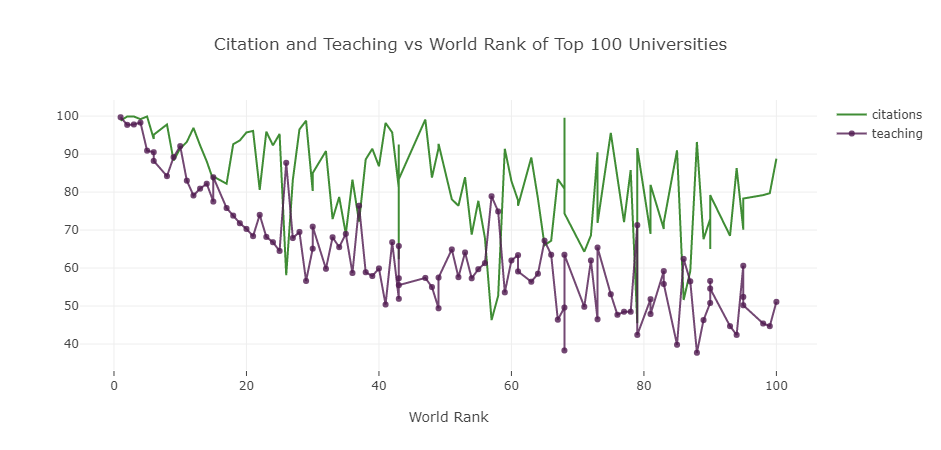

In [7]:
# 創建 data frame
df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# 設置第一條折線trace1
# go.Scatter可以創建一個散點圖或者折線圖的物件，我們將其命名為trace1
trace1 = go.Scatter(
                    x = df.world_rank,   # 定義坐標軸的映射關係，將world_rank這一列作為x軸
                    y = df.citations,    # 同理，將citations這一列作為y軸
                    mode = "lines",      # 我們要繪製折線圖，所以將mode設置為“lines”
                    name = "citations",  # 將這條折線命名為citations
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'), 
                    # maker用來定義點的性質，如顏色、大小等
                    text= df.university_name)
                    # 將university_name一列設置為懸停文本（滑鼠懸停在圖片上方顯示的內容）

# 設置第二條折線trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers", #繪製的折線圖由散點連接而成，即lines+markers
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)

data = [trace1, trace2]

# 添加圖層layout
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              # 設置圖像的標題
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
              # 設置x軸名稱，x軸刻度線的長度，不顯示零線
             ) 

# 將data與layout組合為一個圖像
fig = dict(data = data, layout = layout)
# 繪製圖像
iplot(fig)

## Scatter Charts（散點圖）

示例圖像: Citationvsworld rank of top 100 universities with 2014, 2015 and 2016 years

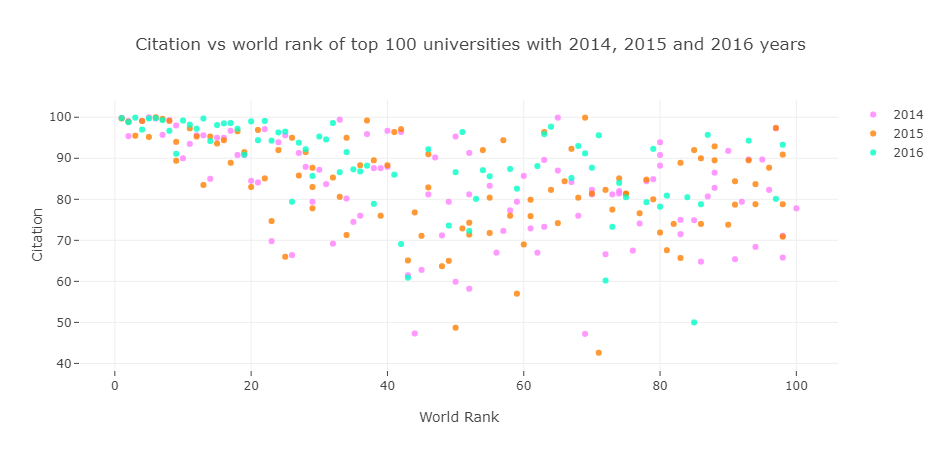

In [8]:
# 創建 data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go
# 創建 trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# 創建 trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# 創建 trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

## Bar Charts（柱狀圖）

### 示例圖像一: 2014年全國大學排名前三名的引文與教學情況(style1)

In [9]:
# 準備 data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


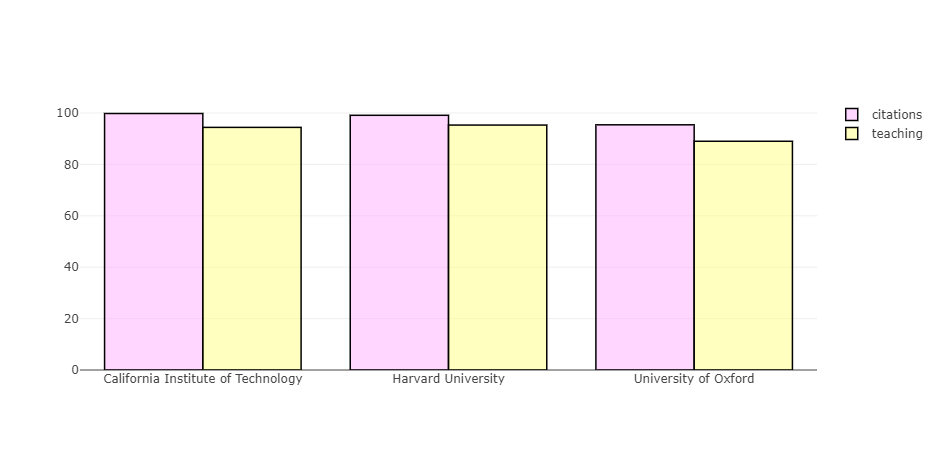

In [10]:
# 準備 data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

# go.Bar可以創建一個柱狀圖物件，我們將其命名為trace1
# 構造 trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
# 構造 trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
data = [trace1, trace2]
# barmode：設置橫條圖的形式，“group”為分組橫條圖
layout = go.Layout(barmode = "group")   
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### 示例圖像二: 2014年全國大學排名前三名的引文與教學情況(style2)  

PS:實際上，在前面的示例中只將barmode從group更改為stack，就可以實現在這裡所做的操作。本例使用了不同的語法。

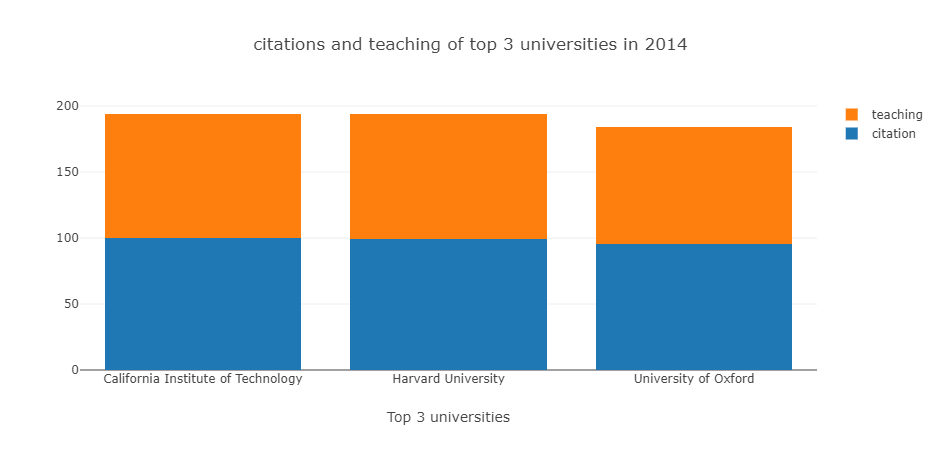

In [11]:
# 準備 data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

x = df2014.university_name

trace1 = {
  'x': x,
  'y': df2014.citations,
  'name': 'citation',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': df2014.teaching,
  'name': 'teaching',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top 3 universities'},
  'barmode': 'stack',   # 橫條圖形式設置為堆積橫條圖
  'title': 'citations and teaching of top 3 universities in 2014'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### 示例三: 水準橫條圖(style3)， Citation vs income for universities

- Import graph_objs as go 並且 import tools
    - Tools: 用於創建子圖

- 構造 trace1
    - bar: 柱狀圖
        - x = x 軸
        - y = y 軸
        - marker
            - color: 每個bar的顏色
            - line: bar的邊框顏色和寬度
        - name: bar的名稱
        - orientation: bar的方向：例如水準（horizontal）
- 構造 trace2
    - scatter: 散點圖
        - x = x 軸
        - y = y 軸
        - mode: 設置散點圖類型為 'line + markers'
            - line: 線的屬性
            - color: 線的顏色
        - name: 散點圖的名稱
- layout: 添加 axis, legend(圖例), margin（旁注）, paper 和 plot properties


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



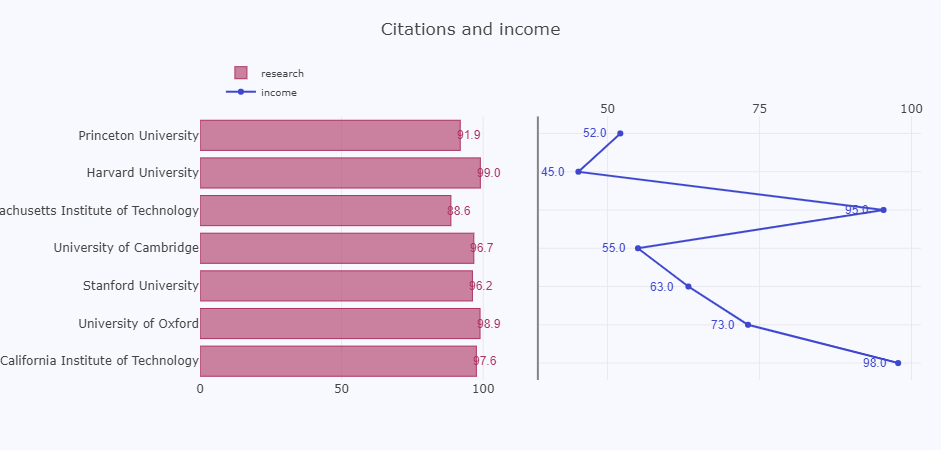

In [12]:
# import graph objects as "go" and import tools
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
# 準備 data frames
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

y_saving = [each for each in df2016.research]
y_net_worth  = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth  = [each for each in df2016.university_name]
trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='research',
                orientation='h',    # Bar的方向設置為水準（horizontal）
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)
layout = dict(
                title='Citations and income',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),  # showticklables用來決定是否顯示每個bar的旁注，domain用來設置y軸長度
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),  #設置圖例標誌的大小和位置
                margin=dict(l=200, r=20,t=70,b=70), # 設置bar旁注的長度、大小等
                paper_bgcolor='rgb(248, 248, 255)', # 設置整個面板的背景色
                plot_bgcolor='rgb(248, 248, 255)',  # 設置圖像部份的背景色
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# 添加 labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # 標注散點圖
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # 標注橫條圖
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# 創建兩個子圖
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

## Pie Charts（圓形圖）

### 示例: Students rate of top 7 universities in 2016

- 	fig: 創建圖形
    - data:
        - values: 值
        - labels: 標籤
        - name: 名稱
        - hoverinfo: 懸停文本
        - hole: 孔寬
        - type: 圖像類型，如pie
    - layout: 佈局
        - title: 標題
        - annotations: font, showarrow, text, x, y

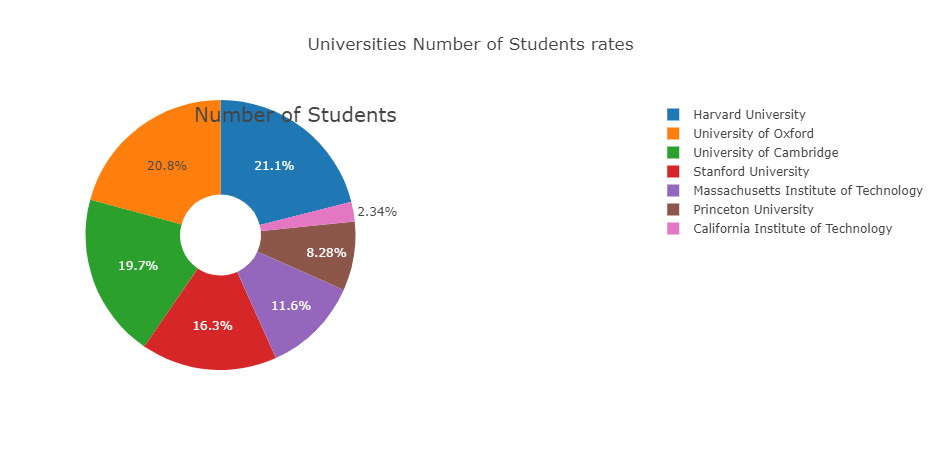

In [13]:
# 準備數據
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name
# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

## Bubble Charts（冒泡圖）

### 冒泡圖示例: University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016
    - x ：x 軸
    - y ：y 軸
    - mode ：markers(scatter)
    - marker ：marker的屬性
        - color
        - size
    - text: university names

In [14]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1803 to 1809
Data columns (total 14 columns):
world_rank                7 non-null object
university_name           7 non-null object
country                   7 non-null object
teaching                  7 non-null float64
international             7 non-null object
research                  7 non-null float64
citations                 7 non-null float64
income                    7 non-null object
total_score               7 non-null object
num_students              7 non-null object
student_staff_ratio       7 non-null float64
international_students    7 non-null object
female_male_ratio         6 non-null object
year                      7 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 840.0+ bytes


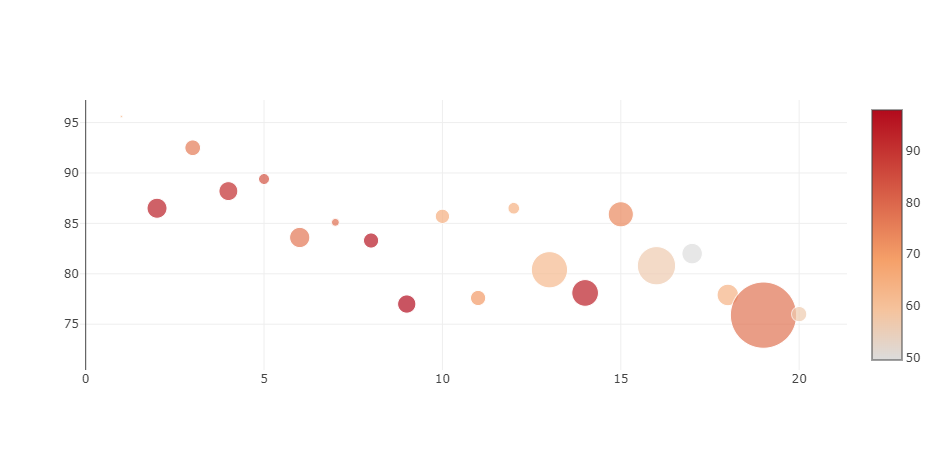

In [15]:
# 準備數據
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]
data = [
    {
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text" :  df2016.university_name    
    }
]
iplot(data)

## Histogram（長條圖）

讓我們看一下2011年和2012年學生與員工比例的長條圖：'students-staff ratio in 2011 and 2012 years'

    - trace1 ： 第一個長條圖
        - x ： x 軸
        - y ： y 軸
        - opacity ： histogram的不透明度
        - name ： 圖例名稱
        - marker ： histogram的顏色
    - trace2 ： 第二個長條圖
    - layout ： 佈局
        - barmode ： 長條圖模式，如overlay，stack

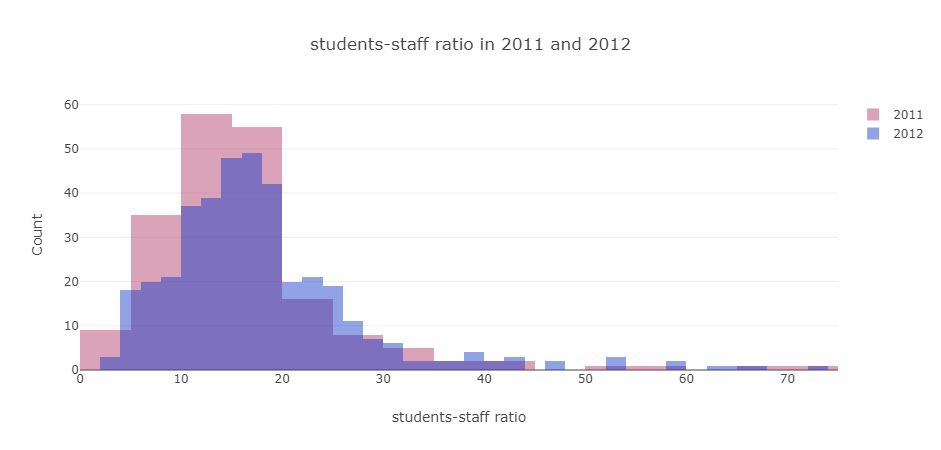

In [16]:
# 準備數據
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Word Cloud（詞雲）

不是pyplot，但學習詞雲對於視覺化很有幫助。讓我們看看2011年哪個國家被提及最多。

    - WordCloud ： 導入的詞雲庫
        - background_color ：背景顏色
        - generate ： 生成國家/地區名稱清單（x2011）詞雲


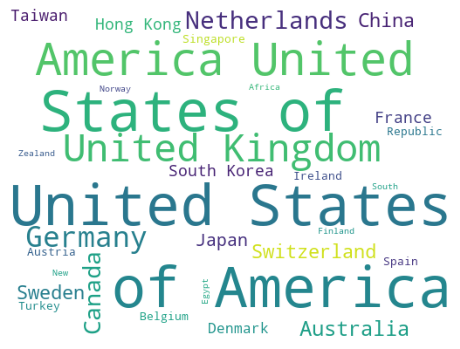

In [17]:
# 準備數據
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

## Box Plots（箱型圖）

盒圖(boxplot)對於顯示資料的離散的分佈情況效果不錯

盒圖是在1977年由美國的統計學家約翰·圖基(John Tukey)發明的。它由五個數值點組成：最小值(min)，下四分位數(Q1)，中位數(median)，上四分位數(Q3)，最大值(max)。也可以往盒圖裡面加入平均值(mean)。如上圖。下四分位數、中位數、上四分位元陣列成一個“帶有隔間的盒子”。上四分位數到最大值之間建立一條延伸線，這個延伸線成為“鬍鬚(whisker)”。
由於現實資料中總是存在各式各樣地“髒資料”，也成為“離群點”，於是為了不因這些少數的離群資料導致整體特徵的偏移，將這些離群點單獨匯出，而盒圖中的鬍鬚的兩級修改成最小觀測值與最大觀測值。這裡有個經驗，就是最大(最小)觀測值設置為與四分位數值間距離為1.5個IQR(中間四分位數極差)。即：

    - IQR = Q3-Q1，即上四分位數與下四分位數之間的差，也就是盒子的長度。
    - 最小觀測值為min = Q1 - 1.5* IQR，如果存在離群點小於最小觀測值，則鬍鬚下限為最小觀測值，離群點單獨以點匯出。如果沒有比最小觀測值小的數，則鬍鬚下限為最小值。
    - 最大觀測值為max = Q3 -1.5* IQR，如果存在離群點大於最大觀測值，則鬍鬚上限為最大觀測值，離群點單獨以點匯出。如果沒有比最大觀測值大的數，則鬍鬚上限為最大值。

通過盒圖，在分析資料的時候，盒圖能夠有效地説明我們識別資料的特徵：

    - 直觀地識別資料集中的異常值(查看離群點)。
    - 判斷資料集的資料離散程度和偏向(觀察盒子的長度，上下隔間的形狀，以及鬍鬚的長度)

以上內容引自該博客：https://www.cnblogs.com/tsingke/p/6565605.html

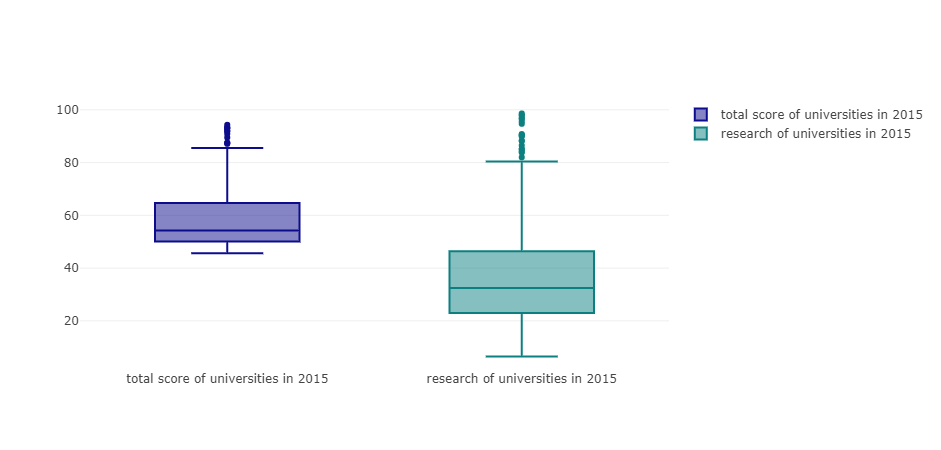

In [18]:
# 準備數據
x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(
    y=x2015.total_score,
    name = 'total score of universities in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

## ScatterPlot Matrix（散點圖矩陣）

Scatter Matrix ： 散點圖矩陣允許同時看到多個單獨變數的分佈和它們兩兩之間的關係

- import figure factory as ff
- create_scatterplotmatrix ：創建散點圖
    - data2015 ：用到的資料，即索引1-401之間的 research, international 和 total scores 三個變數
    - colormap ：色盤
    - colormap_type ：色盤類型
    - height
    - weight


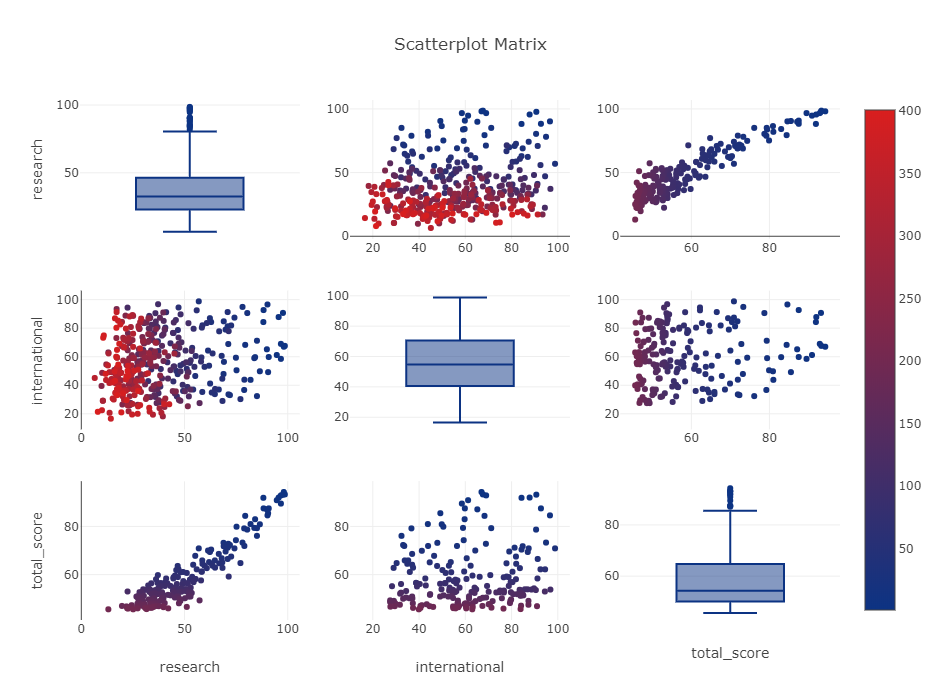

In [19]:
# import figure factory
import plotly.figure_factory as ff
# 準備數據
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)
# 繪製散點圖矩陣
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

## Inset Plots（內置圖）

- Inset Matrix ： 2個圖在一個視窗中

內置圖示例：'Income and Teaching vs World Rank of Universities'


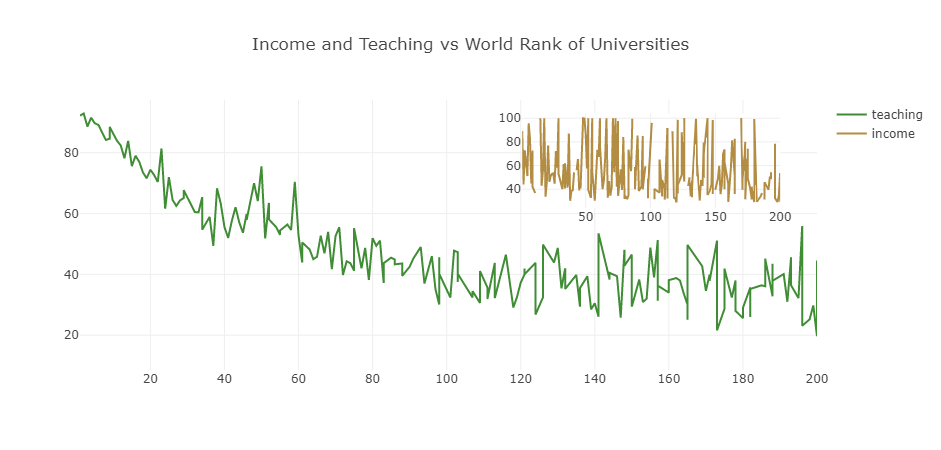

In [20]:
# 第一個線型圖
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# 第二個線型圖
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## 3D Scatter Plot (3D散點圖)

3D Scatter: 有時2D不足以理解資料。因此，添加一個維度會增加資料的可懂度。

- go.Scatter3d: 創建三維散點圖
- x,y,z: 圖像的3個軸
- mode: 設置為scatter
- size: marker的大小
- color: 色卡


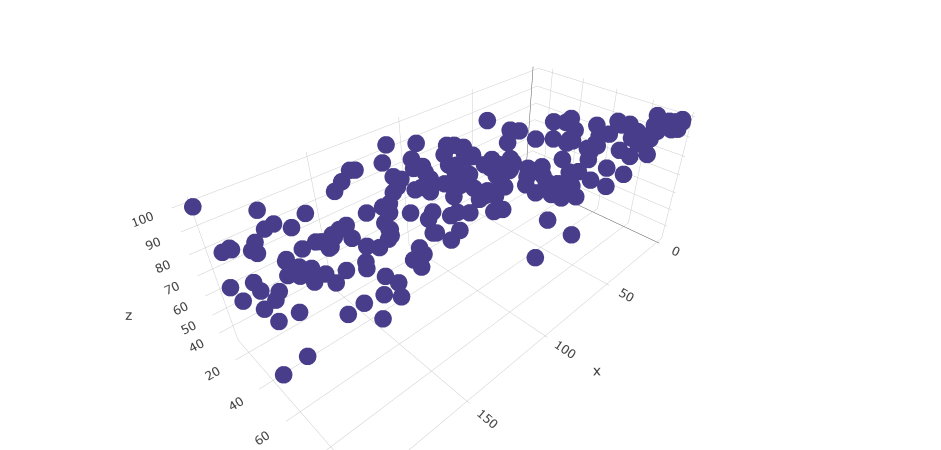

In [21]:
# 構造3D散點圖trace1
trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(72,61,139)',     # RGB顏色對照表可參考：https://tool.oschina.net/commons?type=3    
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Multiple Subplots（多子圖）

Multiple Subplots: 在比較多個特徵時，多個子圖很有效。

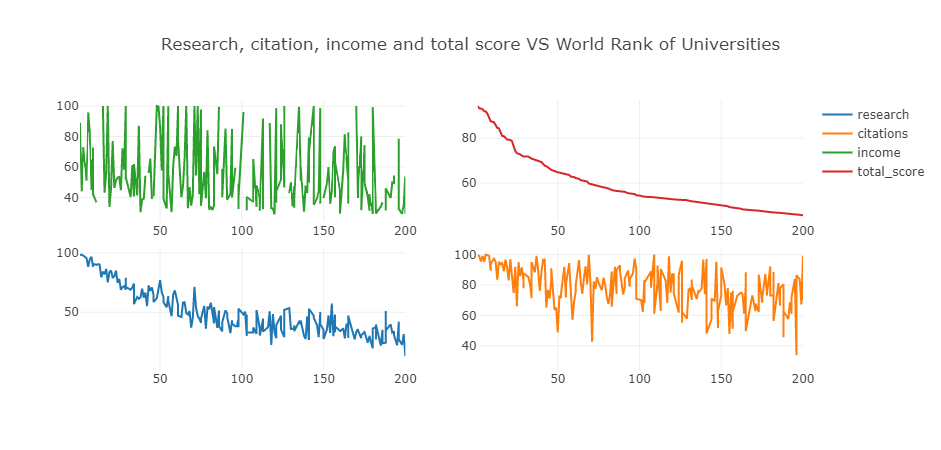

In [22]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)